In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [105]:
# read 2 rows of the file before loading it
!head -2 data/incident_reports.csv

Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140,VS,Vehicle Supplement,,07041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000,Southern,Bayview Hunters Point,10,37.72171587946975,-122.39594382884452,"(37.72171587946975, -122.39594382884452)"


In [106]:
police_df = pd.read_csv('data/incident_reports.csv')

In [107]:
#police_df.head()

In [108]:
police_df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point'],
      dtype='object')

In [391]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446631 entries, 0 to 446630
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        446631 non-null  object 
 1   Incident Date            446631 non-null  object 
 2   Incident Time            446631 non-null  object 
 3   Incident Year            446631 non-null  int64  
 4   Incident Day of Week     446631 non-null  object 
 5   Report Datetime          446631 non-null  object 
 6   Row ID                   446631 non-null  int64  
 7   Incident ID              446631 non-null  int64  
 8   Incident Number          446631 non-null  int64  
 9   CAD Number               349196 non-null  float64
 10  Report Type Code         446631 non-null  object 
 11  Report Type Description  446631 non-null  object 
 12  Filed Online             89169 non-null   object 
 13  Incident Code            446631 non-null  int64  
 14  Inci

In [129]:
extract_df = police_df.copy()

In [130]:
extract_df['Incident Date'] = pd.to_datetime(extract_df['Incident Date'])

In [131]:
#extract_df.info()

In [132]:
# drop some of the columns

extract_df = extract_df.drop(['Incident Datetime', 'Report Type Code' , 'Report Type Description' , 'CAD Number' , 'CNN', 
                              'Supervisor District' , 'Resolution', 'Filed Online', 'Incident Number',
                              'Incident Code' , 'Police District']
                             , axis = 1)

In [133]:
extract_df.columns

Index(['Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Intersection', 'Analysis Neighborhood', 'Latitude', 'Longitude',
       'point'],
      dtype='object')

In [134]:
extract_df.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018-01-01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"
2,2018-01-01,10:00,2018,Monday,2018/01/01 10:20:00 AM,61893275000,618932,Missing Person,Missing Person,Found Person,VAN NESS AVE \ WILLOW ST,Tenderloin,37.783370,-122.420832,"(37.78337048750076, -122.42083185184009)"
3,2018-01-01,10:03,2018,Monday,2018/01/01 10:04:00 AM,61893565015,618935,Other Miscellaneous,Other,"Driving, No License Issued",BRAZIL AVE \ MISSION ST,Outer Mission,37.724683,-122.434798,"(37.72468255342173, -122.43479841474401)"
4,2018-01-01,09:01,2018,Monday,2018/01/01 09:39:00 AM,61893607041,618936,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",CUSTOM HOUSE PL \ JACKSON ST,Chinatown,37.796698,-122.401294,"(37.796698028315056, -122.40129440446798)"


In [135]:
extract_violent= extract_df[(extract_df['Incident Category'] == 'Homicide')
                           |(extract_df['Incident Category'] == 'Rape')
                           |(extract_df['Incident Category'] == 'Robbery')
                           |(extract_df['Incident Category'] == 'Assault')
                           |(extract_df['Incident Category'] == 'Traffic Violation Arrest')
                           |(extract_df['Incident Category'] == 'Offences Against The Family And Children')
                           |(extract_df['Incident Category'] == 'Drug Offense')]

In [136]:
extract_violent.count()

Incident Date            62155
Incident Time            62155
Incident Year            62155
Incident Day of Week     62155
Report Datetime          62155
Row ID                   62155
Incident ID              62155
Incident Category        62155
Incident Subcategory     62155
Incident Description     62155
Intersection             61885
Analysis Neighborhood    61863
Latitude                 61885
Longitude                61885
point                    61885
dtype: int64

In [137]:
extract_violent.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
5,2018-01-01,01:30,2018,Monday,2018/01/01 01:44:00 AM,61893704136,618937,Assault,Simple Assault,Battery with Serious Injuries,CALIFORNIA ST \ DRUMM ST,Financial District/South Beach,37.793664,-122.396390,"(37.793663777154755, -122.39639041612962)"
8,2018-01-01,09:00,2018,Monday,2018/01/01 10:14:00 AM,61894004013,618940,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",LAKEVIEW AVE \ MAJESTIC AVE,Oceanview/Merced/Ingleside,37.716978,-122.451895,"(37.7169775067907, -122.45189499287864)"
15,2018-01-01,10:45,2018,Monday,2018/01/01 11:30:00 AM,61894803044,618948,Robbery,Robbery - Commercial,"Robbery, Chain Store, W/ Force",OFARRELL ST \ SECURITY PACIFIC PL,Financial District/South Beach,37.786748,-122.405346,"(37.786747617678444, -122.40534607993492)"
22,2018-01-01,13:45,2018,Monday,2018/01/01 03:15:00 PM,61900304013,619003,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",GENEVA AVE \ NAPLES ST,Excelsior,37.714209,-122.436176,"(37.714209482735754, -122.43617646639477)"
24,2018-01-01,14:15,2018,Monday,2018/01/01 02:51:00 PM,61900504138,619005,Assault,Simple Assault,"Battery, former Spouse or Dating Relationship",SOUTH VAN NESS AVE \ 26TH ST,Mission,37.749172,-122.415955,"(37.749172182064, -122.41595464350685)"


In [138]:
violent_by_category= extract_violent.groupby('Incident Category').count().sort_values(by = 'Row ID').reset_index(drop= False)

In [139]:
violent_by_category

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Homicide,54,54,54,54,54,54,54,54,54,52,52,52,52,52
1,Rape,114,114,114,114,114,114,114,114,114,114,114,114,114,114
2,Traffic Violation Arrest,5310,5310,5310,5310,5310,5310,5310,5310,5310,5304,5299,5304,5304,5304
3,Offences Against The Family And Children,8876,8876,8876,8876,8876,8876,8876,8876,8876,8861,8858,8861,8861,8861
4,Robbery,10461,10461,10461,10461,10461,10461,10461,10461,10461,10379,10375,10379,10379,10379
5,Drug Offense,10950,10950,10950,10950,10950,10950,10950,10950,10950,10868,10868,10868,10868,10868
6,Assault,26390,26390,26390,26390,26390,26390,26390,26390,26390,26307,26297,26307,26307,26307


In [140]:
extract_property = extract_df[ (extract_df['Incident Category'] == 'Burglary')
                              |(extract_df['Incident Category'] == 'Motor Vehicle Theft')
                              |(extract_df['Incident Category'] == 'Larceny Theft')
                              |(extract_df['Incident Category'] == 'Arson')]

In [141]:
extract_property.count()

Incident Date            179595
Incident Time            179595
Incident Year            179595
Incident Day of Week     179595
Report Datetime          179595
Row ID                   179595
Incident ID              179595
Incident Category        179595
Incident Subcategory     179595
Incident Description     179595
Intersection             166906
Analysis Neighborhood    166890
Latitude                 166906
Longitude                166906
point                    166906
dtype: int64

In [142]:
property_by_category= extract_property.groupby('Incident Category').count().sort_values('Row ID').reset_index(drop= False)

In [143]:
property_by_category

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Arson,1214,1214,1214,1214,1214,1214,1214,1214,1214,1213,1213,1213,1213,1213
1,Motor Vehicle Theft,20013,20013,20013,20013,20013,20013,20013,20013,20013,19758,19755,19758,19758,19758
2,Burglary,24530,24530,24530,24530,24530,24530,24530,24530,24530,24269,24266,24269,24269,24269
3,Larceny Theft,133838,133838,133838,133838,133838,133838,133838,133838,133838,121666,121656,121666,121666,121666


## 2018

In [144]:
crime_2018 = extract_df[extract_df['Incident Year'] == 2018].reset_index(drop = True)

In [145]:
crime_2018['Incident Date'] = pd.to_datetime(crime_2018['Incident Date'])

In [65]:
crime_per_category_18=crime_2018.groupby('Incident Category').count().sort_values(by = 'Row ID', ascending= False).reset_index(drop=False)

In [66]:
crime_per_category_18

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Larceny Theft,48841,48841,48841,48841,48841,48841,48841,48841,48841,44173,44170,44173,44173,44173
1,Other Miscellaneous,11797,11797,11797,11797,11797,11797,11797,11797,11797,11769,11765,11769,11769,11769
2,Non-Criminal,9628,9628,9628,9628,9628,9628,9628,9628,9628,9536,9535,9536,9536,9536
3,Assault,9051,9051,9051,9051,9051,9051,9051,9051,9051,9034,9029,9034,9034,9034
4,Malicious Mischief,8879,8879,8879,8879,8879,8879,8879,8879,8879,8464,8463,8464,8464,8464
5,Burglary,7107,7107,7107,7107,7107,7107,7107,7107,7107,7039,7039,7039,7039,7039
6,Lost Property,5793,5793,5793,5793,5793,5793,5793,5793,5793,4684,4683,4684,4684,4684
7,Warrant,5581,5581,5581,5581,5581,5581,5581,5581,5581,5526,5525,5526,5526,5526
8,Motor Vehicle Theft,5294,5294,5294,5294,5294,5294,5294,5294,5294,5236,5235,5236,5236,5236
9,Fraud,4734,4734,4734,4734,4734,4734,4734,4734,4734,4691,4690,4691,4691,4691


<BarContainer object of 18 artists>

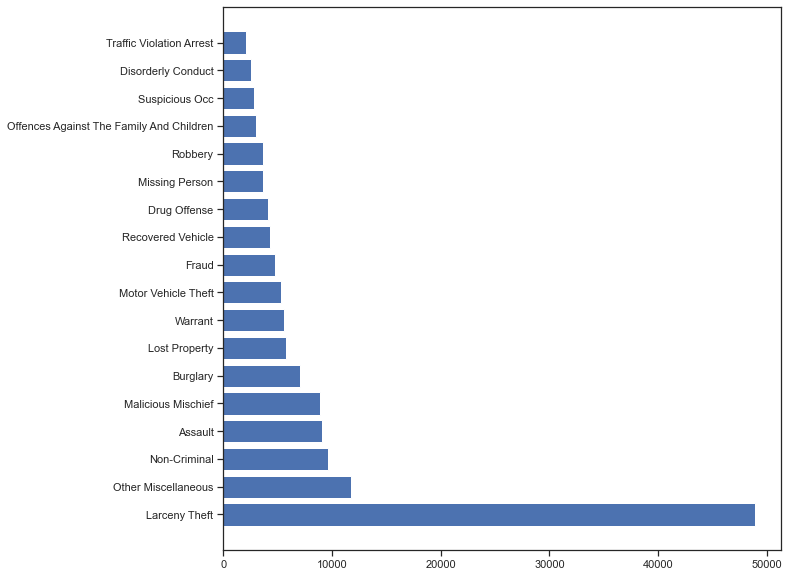

In [388]:
fig , ax = plt.subplots(figsize=(10,10))

x= crime_per_category_18['Incident Category'][:18]
y= crime_per_category_18['Row ID'][:18]

ax.barh(x , y)

In [17]:
crime_per_month_18= crime_2018.groupby(crime_2018['Incident Date'].dt.month).count()

In [18]:
crime_per_month_18

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
Incident Date,,,,,,,,,,,,,,,
1,13341,13341,13341,13341,13341,13341,13341,13340,13340,13341,12621,12618,12621,12621,12621
2,11827,11827,11827,11827,11827,11827,11827,11824,11824,11827,11200,11200,11200,11200,11200
3,12524,12524,12524,12524,12524,12524,12524,12522,12522,12524,11918,11912,11918,11918,11918
4,12516,12516,12516,12516,12516,12516,12516,12514,12514,12516,11861,11857,11861,11861,11861
5,12954,12954,12954,12954,12954,12954,12954,12954,12954,12954,12273,12272,12273,12273,12273
6,12418,12418,12418,12418,12418,12418,12418,12418,12418,12418,11751,11745,11751,11751,11751
7,13815,13815,13815,13815,13815,13815,13815,13813,13813,13815,13093,13091,13093,13093,13093
8,13917,13917,13917,13917,13917,13917,13917,13916,13916,13917,13191,13183,13191,13191,13191
9,12793,12793,12793,12793,12793,12793,12793,12791,12791,12793,12162,12159,12162,12162,12162


In [19]:
crime_past_ma18 = crime_2018[crime_2018['Incident Date'].dt.month > 2]

In [20]:
#crime_past_ma18.info()

In [180]:
property_ma_18= extract_property[(extract_property['Incident Year']== 2018)
                                & (extract_property['Incident Date'].dt.month>2)]

In [181]:
prop_cat_ma18=property_ma_18.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

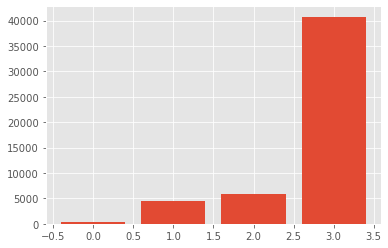

In [210]:
fig , ax = plt.subplots()

x= np.arange(4)
h= prop_cat_ma18['Row ID']

ax.bar(x,h);

In [198]:
violent_ma_18= extract_violent[(extract_violent['Incident Year']== 2018)
                                & (extract_violent['Incident Date'].dt.month>2)]

In [199]:
violent_cat_ma18= violent_ma_18.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

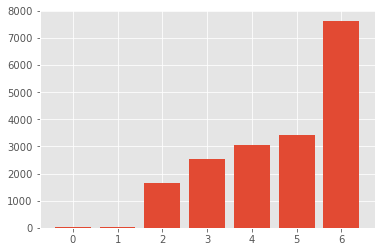

In [212]:
fig , ax = plt.subplots()

x= np.arange(7)
l= violent_cat_ma18['Row ID']

ax.bar(x,l);

## 2019

In [21]:
crime_2019= extract_df[extract_df['Incident Year'] == 2019].reset_index(drop=True)


In [22]:
crime_2019['Incident Date'] = pd.to_datetime(crime_2019['Incident Date'])

In [23]:
#crime_2019.tail(3)

In [24]:
#crime_2019.info()

In [25]:
crime_per_month_19= crime_2019.groupby(crime_2019['Incident Date'].dt.month).count()

In [26]:
crime_per_month_19

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
Incident Date,,,,,,,,,,,,,,,
1,12164,12164,12164,12164,12164,12164,12164,12163,12163,12164,11535,11530,11535,11535,11535
2,11017,11017,11017,11017,11017,11017,11017,11016,11016,11017,10414,10413,10414,10414,10414
3,11840,11840,11840,11840,11840,11840,11840,11839,11839,11840,11113,11108,11113,11113,11113
4,11834,11834,11834,11834,11834,11834,11834,11834,11834,11834,11243,11239,11243,11243,11243
5,12312,12312,12312,12312,12312,12312,12312,12310,12310,12312,11697,11697,11697,11697,11697
6,12136,12136,12136,12136,12136,12136,12136,12136,12136,12136,11472,11470,11472,11472,11472
7,13145,13145,13145,13145,13145,13145,13145,13145,13145,13145,12422,12420,12422,12422,12422
8,13772,13772,13772,13772,13772,13772,13772,13771,13771,13772,12897,12897,12897,12897,12897
9,12922,12922,12922,12922,12922,12922,12922,12922,12922,12922,12246,12245,12246,12246,12246


In [27]:
crime_per_category_19 = crime_2019.groupby('Incident Category').count().sort_values(by= 'Row ID').reset_index(drop=False)

In [28]:
crime_per_category_19

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Gambling,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,"Human Trafficking, Commercial Sex Acts",9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,Weapons Offence,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,Homicide,15,15,15,15,15,15,15,15,15,14,14,14,14,14
4,"Human Trafficking (A), Commercial Sex Acts",16,16,16,16,16,16,16,16,16,16,16,16,16,16
5,Motor Vehicle Theft?,21,21,21,21,21,21,21,21,21,19,19,19,19,19
6,Suspicious,23,23,23,23,23,23,23,23,23,23,23,23,23,23
7,Liquor Laws,29,29,29,29,29,29,29,29,29,29,29,29,29,29
8,Rape,39,39,39,39,39,39,39,39,39,39,39,39,39,39
9,Drug Violation,47,47,47,47,47,47,47,47,47,47,47,47,47,47


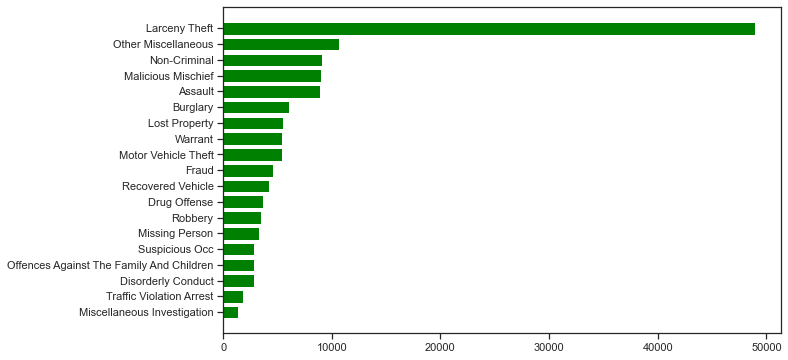

In [386]:
fig , ax = plt.subplots(figsize = (10, 6))

x= crime_per_category_19['Incident Category'][30:]
y= crime_per_category_19['Row ID'][30:]

ax.barh(x,y , color = 'green');

In [161]:
property_ma_19= extract_property[(extract_property['Incident Year']== 2019)
                                & (extract_property['Incident Date'].dt.month>2)]

In [162]:
prop_cat_ma19=property_ma_19.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

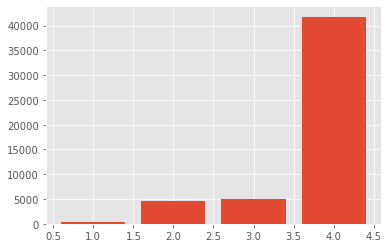

In [204]:
fig , ax = plt.subplots()

x= np.array([1,2,3,4])
m= prop_cat_ma19['Row ID']

ax.bar(x,m);

In [201]:
violent_ma_19= extract_violent[(extract_violent['Incident Year']== 2019)
                                & (extract_violent['Incident Date'].dt.month>2)]

In [202]:
violent_cat_ma19= violent_ma_19.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

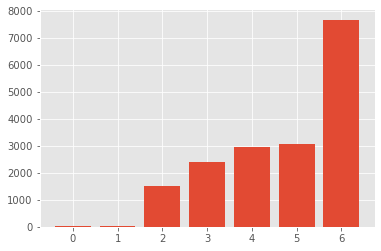

In [203]:
fig , ax = plt.subplots()

x= np.arange(7)
z= violent_cat_ma19['Row ID']

ax.bar(x,z);

In [287]:
prop_ma_19_2cat= property_ma_19.groupby(['Incident Category', 'Incident Subcategory']).count().sort_values(by=['Incident Category','Row ID'], ascending = False).reset_index()

In [331]:
prop_ma_19_2cat.head(2)

,Incident Category,Incident Subcategory,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Motor Vehicle Theft,Motor Vehicle Theft,4537,4537,4537,4537,4537,4537,4537,4537,4454,4453,4454,4454,4454
1,Motor Vehicle Theft,Motor Vehicle Theft (Attempted),40,40,40,40,40,40,40,40,40,40,40,40,40


In [292]:
compare_subs_19 = prop_ma_19_2cat[['Incident Category' , 'Incident Subcategory' , 'Row ID']].copy()

In [305]:
compare_subs_19.rename(columns={'2020 Count' : '2019 Count'} , inplace= True)

In [307]:
compare_subs_19.head()

,Incident Category,Incident Subcategory,2019 Count
0,Motor Vehicle Theft,Motor Vehicle Theft,4537
1,Motor Vehicle Theft,Motor Vehicle Theft (Attempted),40
2,Larceny Theft,Larceny - From Vehicle,24202
3,Larceny Theft,Larceny Theft - Other,10130
4,Larceny Theft,Larceny Theft - From Building,2341


## 2020

In [30]:
crime_2020= extract_df[extract_df['Incident Year'] == 2020].reset_index(drop=True)

In [31]:
#crime_2020.info()

In [32]:
type(crime_2020.iloc[0, 1])

str

In [33]:
crime_2020['Incident Date'] = pd.to_datetime(crime_2020['Incident Date'])

In [396]:
crime_2020.count()[0]

118047

In [397]:
crime_2019.count()[0]

149411

In [398]:
crime_per_month_20= crime_2020.groupby(crime_2020['Incident Date'].dt.month).count()

In [399]:
crime_per_month_20

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
Incident Date,,,,,,,,,,,,,,,
1,12407,12407,12407,12407,12407,12407,12407,12406,12406,12407,11683,11682,11683,11683,11683
2,11459,11459,11459,11459,11459,11459,11459,11450,11450,11459,10879,10876,10879,10879,10879
3,9435,9435,9435,9435,9435,9435,9435,9407,9407,9435,9013,9011,9013,9013,9013
4,7993,7993,7993,7993,7993,7993,7993,7894,7894,7993,7712,7712,7712,7712,7712
5,9496,9496,9496,9496,9496,9496,9496,9460,9460,9496,9143,9143,9143,9143,9143
6,9116,9116,9116,9116,9116,9116,9116,9102,9102,9116,8741,8738,8741,8741,8741
7,9841,9841,9841,9841,9841,9841,9841,9837,9837,9841,9440,9439,9440,9440,9440
8,9658,9658,9658,9658,9658,9658,9658,9644,9644,9658,9206,9202,9206,9206,9206
9,9110,9110,9110,9110,9110,9110,9110,9085,9085,9110,8717,8712,8717,8717,8717


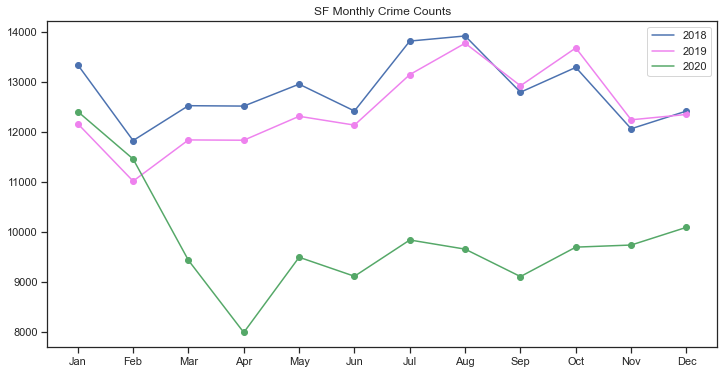

In [393]:
fig, ax = plt.subplots(figsize=(12, 6))

x = ['Jan' , 'Feb' , 'Mar', 'Apr' , 'May' , 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = crime_per_month_20['Row ID']
z = crime_per_month_19['Row ID']
w = crime_per_month_18['Row ID']

ax.plot(x , w , label = '2018' , color = 'b')
ax.scatter(x,w, color = 'b')
ax.plot(x , z , label = '2019', color= 'violet')
ax.scatter(x,z, color = 'violet')
ax.plot(x , y , label= '2020', color = 'g')
ax.scatter(x,y, color = 'g')
plt.title('SF Monthly Crime Counts')
plt.legend();

In [38]:
crime_per_day_20 = crime_2020.groupby('Incident Date').count().sort_values(by = 'Incident Date', ascending= False).reset_index(drop = False)

In [39]:
crime_per_day_20.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2020-12-31,385,385,385,385,385,385,385,385,385,368,368,368,368,368
1,2020-12-30,325,325,325,325,325,325,324,324,325,311,311,311,311,311
2,2020-12-29,348,348,348,348,348,348,348,348,348,334,334,334,334,334
3,2020-12-28,373,373,373,373,373,373,365,365,373,359,359,359,359,359
4,2020-12-27,272,272,272,272,272,272,270,270,272,261,261,261,261,261


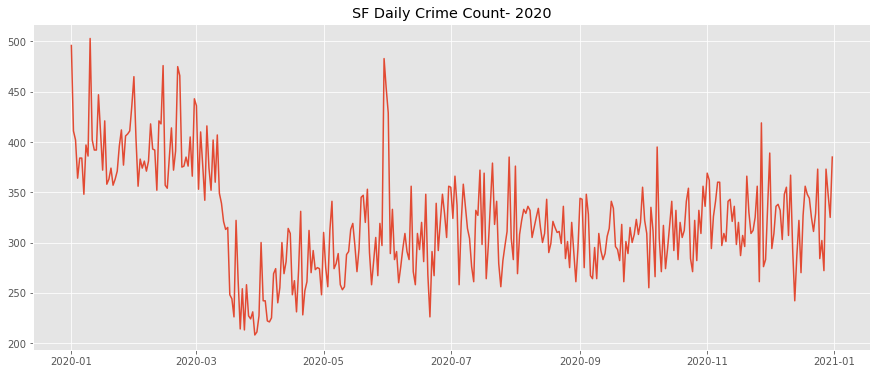

In [40]:
fig , ax = plt.subplots(figsize = (15, 6))

x= crime_per_day_20['Incident Date']
y= crime_per_day_20['Row ID']

ax.plot(x, y)
plt.title('SF Daily Crime Count- 2020');

In [41]:
#crime_per_category_20 = crime_2020.groupby()

In [42]:
#crime_2020['Incident Date'].dt.month > 2

In [43]:
crime_past_ma20 = crime_2020[crime_2020['Incident Date'].dt.month > 2]

In [44]:
#crime_past_ma20.info()

In [45]:
crime_past_ma19 = crime_2019[crime_2019['Incident Date'].dt.month > 2]

In [46]:
#crime_past_ma19.info()

In [47]:
#crime_past_ma19.groupby('Incident Category').count().sort_values(by = 'Row ID', ascending= False)

In [48]:
#crime_past_ma20.groupby('Incident Category').count().sort_values(by = 'Row ID', ascending= False)

<BarContainer object of 3 artists>

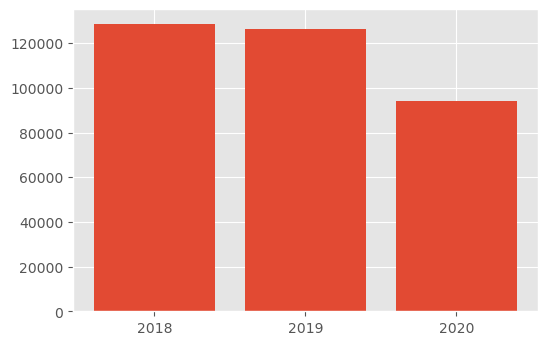

In [49]:
fig , ax = plt.subplots(dpi= 100)

x = np.array(['2018', '2019' , '2020'])
y= np.array([128706, 126230 , 94181])

ax.bar(x,y)

In [154]:
property_ma_20= extract_property[(extract_property['Incident Year']== 2020)
                                & (extract_property['Incident Date'].dt.month>2)]

In [159]:
prop_cat_ma20=property_ma_20.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

In [234]:
violent_ma_20= extract_violent[(extract_violent['Incident Year']== 2020)
                                & (extract_violent['Incident Date'].dt.month>2)]

In [206]:
violent_cat_ma20= violent_ma_20.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

In [285]:
prop_ma_20_2cat= property_ma_20.groupby(['Incident Category', 'Incident Subcategory']).count().sort_values(by=['Incident Category','Row ID'], ascending = False).reset_index()

In [295]:
prop_ma_20_2cat.head(2)

,Incident Category,Incident Subcategory,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Motor Vehicle Theft,Motor Vehicle Theft,6467,6467,6467,6467,6467,6467,6467,6467,6389,6388,6389,6389,6389
1,Motor Vehicle Theft,Motor Vehicle Theft (Attempted),90,90,90,90,90,90,90,90,89,89,89,89,89


In [294]:
compare_subs_20 = prop_ma_20_2cat[['Incident Category' , 'Incident Subcategory' , 'Row ID']].copy()

In [299]:
compare_subs_20.rename(columns={'Row ID' : '2020 Count'} , inplace= True)

In [300]:
compare_subs_20

,Incident Category,Incident Subcategory,2020 Count
0,Motor Vehicle Theft,Motor Vehicle Theft,6467
1,Motor Vehicle Theft,Motor Vehicle Theft (Attempted),90
2,Larceny Theft,Larceny - From Vehicle,11164
3,Larceny Theft,Larceny Theft - Other,6325
4,Larceny Theft,Theft From Vehicle,1582
5,Larceny Theft,Larceny Theft - From Building,1538
6,Larceny Theft,Larceny Theft - Shoplifting,1228
7,Larceny Theft,Larceny Theft - Bicycle,386
8,Larceny Theft,Larceny - Auto Parts,336
9,Larceny Theft,Larceny Theft - Pickpocket,81


## Comparisons

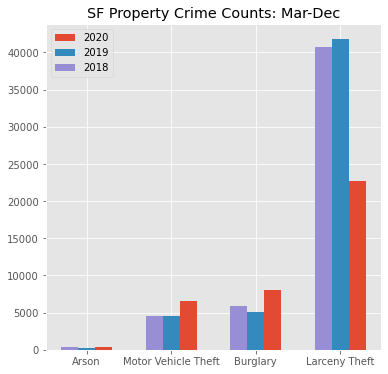

In [226]:
fig , ax = plt.subplots(figsize=(6,6))

#x= prop_cat_ma20['Incident Category']
x= np.array([1,2,3,4])
y= prop_cat_ma20['Row ID']

ax.bar(x+0.2 ,y, width= 0.2 , label = '2020')
ax.bar(x,m, width= 0.2, label = '2019')
ax.bar(x-0.2, h , width = 0.2 , label = '2018')
ax.set_xticks(x)
ax.set_xticklabels(prop_cat_ma20['Incident Category'])
plt.title('SF Property Crime Counts: Mar-Dec')
plt.legend();

## Big increases in some non-violent crimes

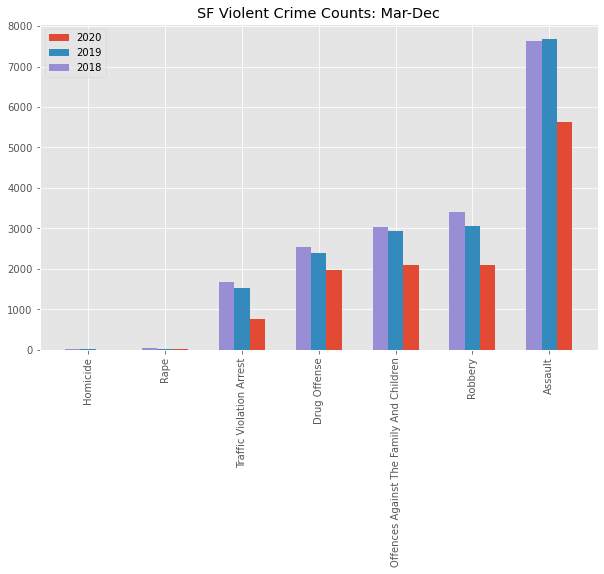

In [225]:
fig , ax = plt.subplots(figsize=(10,6))

#x= prop_cat_ma20['Incident Category']
x= np.arange(7)
y= violent_cat_ma20['Row ID']

ax.bar(x+0.2 ,y, width= 0.2 , label = '2020')
ax.bar(x,z, width= 0.2, label = '2019')
ax.bar(x-0.2, l , width = 0.2 , label = '2018')
ax.set_xticks(x)
ax.set_xticklabels(violent_cat_ma20['Incident Category'], rotation =90)
plt.title('SF Violent Crime Counts: Mar-Dec')
plt.legend();

In [231]:
violent_ma_20.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
648,2020-10-20,23:50,2020,Tuesday,2020/10/21 12:52:00 AM,97124504134,971245,Assault,Simple Assault,Battery,HOUSTON ST \ COLUMBUS AVE,Russian Hill,37.803937,-122.415446,"(37.8039365072563, -122.415445868814)"
8541,2020-08-20,12:51,2020,Thursday,2020/08/28 02:28:00 PM,95672903074,956729,Robbery,Robbery - Other,"Robbery, W/ Force",LEAVENWORTH ST \ TURK ST,Tenderloin,37.782794,-122.414054,"(37.78279444506034, -122.41405376568504)"
8621,2020-08-16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",23RD ST \ ARKANSAS ST,Potrero Hill,37.754827,-122.397729,"(37.75482657770952, -122.39772873392515)"
8751,2020-08-15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,Assault,Simple Assault,Battery,GENEVA AVE \ LONDON ST,Excelsior,37.716039,-122.440255,"(37.716038818883085, -122.44025513581519)"
8754,2020-08-15,13:45,2020,Saturday,2020/08/16 05:40:00 PM,95338215200,953382,Offences Against The Family And Children,Other,Domestic Violence (secondary only),OCEAN AVE \ LEE AVE,West of Twin Peaks,37.723457,-122.454116,"(37.72345700607633, -122.45411575418224)"


In [236]:
violent_ma_20_time= violent_ma_20.copy()

In [237]:
violent_ma_20_time.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
648,2020-10-20,23:50,2020,Tuesday,2020/10/21 12:52:00 AM,97124504134,971245,Assault,Simple Assault,Battery,HOUSTON ST \ COLUMBUS AVE,Russian Hill,37.803937,-122.415446,"(37.8039365072563, -122.415445868814)"
8541,2020-08-20,12:51,2020,Thursday,2020/08/28 02:28:00 PM,95672903074,956729,Robbery,Robbery - Other,"Robbery, W/ Force",LEAVENWORTH ST \ TURK ST,Tenderloin,37.782794,-122.414054,"(37.78279444506034, -122.41405376568504)"
8621,2020-08-16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",23RD ST \ ARKANSAS ST,Potrero Hill,37.754827,-122.397729,"(37.75482657770952, -122.39772873392515)"
8751,2020-08-15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,Assault,Simple Assault,Battery,GENEVA AVE \ LONDON ST,Excelsior,37.716039,-122.440255,"(37.716038818883085, -122.44025513581519)"
8754,2020-08-15,13:45,2020,Saturday,2020/08/16 05:40:00 PM,95338215200,953382,Offences Against The Family And Children,Other,Domestic Violence (secondary only),OCEAN AVE \ LEE AVE,West of Twin Peaks,37.723457,-122.454116,"(37.72345700607633, -122.45411575418224)"


In [229]:
type(violent_ma_20.iloc[1,1])

str

In [248]:
violent_ma_20_time['Time'] = pd.to_datetime(violent_ma_20_time['Incident Time'], format='%H:%M')

In [241]:
violent_ma_20_time['num day']= violent_ma_20_time['Incident Day of Week']

In [243]:
violent_ma_20_time['num day'].replace({'Sunday': 1 , 'Monday': 2 , 'Tuesday': 3, 'Wednesday':4 , 'Thursday':5, 'Friday': 6, 'Saturday':7} ,inplace=True)

In [251]:
violent_ma_20_time.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point,num day,Time
648,2020-10-20,23:50,2020,Tuesday,2020/10/21 12:52:00 AM,97124504134,971245,Assault,Simple Assault,Battery,HOUSTON ST \ COLUMBUS AVE,Russian Hill,37.803937,-122.415446,"(37.8039365072563, -122.415445868814)",3,1900-01-01 23:50:00
8541,2020-08-20,12:51,2020,Thursday,2020/08/28 02:28:00 PM,95672903074,956729,Robbery,Robbery - Other,"Robbery, W/ Force",LEAVENWORTH ST \ TURK ST,Tenderloin,37.782794,-122.414054,"(37.78279444506034, -122.41405376568504)",5,1900-01-01 12:51:00
8621,2020-08-16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,Assault,Aggravated Assault,"Firearm, Discharging in Grossly Negligent Manner",23RD ST \ ARKANSAS ST,Potrero Hill,37.754827,-122.397729,"(37.75482657770952, -122.39772873392515)",1,1900-01-01 03:13:00
8751,2020-08-15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,Assault,Simple Assault,Battery,GENEVA AVE \ LONDON ST,Excelsior,37.716039,-122.440255,"(37.716038818883085, -122.44025513581519)",7,1900-01-01 12:43:00
8754,2020-08-15,13:45,2020,Saturday,2020/08/16 05:40:00 PM,95338215200,953382,Offences Against The Family And Children,Other,Domestic Violence (secondary only),OCEAN AVE \ LEE AVE,West of Twin Peaks,37.723457,-122.454116,"(37.72345700607633, -122.45411575418224)",7,1900-01-01 13:45:00


In [216]:
import seaborn as sns

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


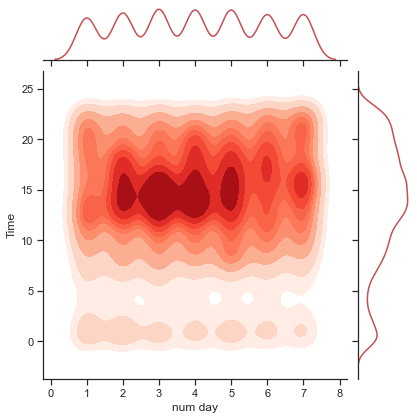

In [260]:
ax = sns.set(style= 'ticks')

x= violent_ma_20_time['num day']
y= violent_ma_20_time['Time'].dt.hour

a= sns.jointplot(x , y, kind = 'kde', color = 'r', shade = True, cmap='Reds')

In [261]:
property_ma_20_time= property_ma_20.copy()

In [262]:
property_ma_20_time['Time'] = pd.to_datetime(property_ma_20_time['Incident Time'], format='%H:%M')

In [263]:
property_ma_20_time['num day']= property_ma_20_time['Incident Day of Week']

In [264]:
property_ma_20_time['num day'].replace({'Sunday': 1 , 'Monday': 2 , 'Tuesday': 3, 'Wednesday':4 , 'Thursday':5, 'Friday': 6, 'Saturday':7} ,inplace=True)

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


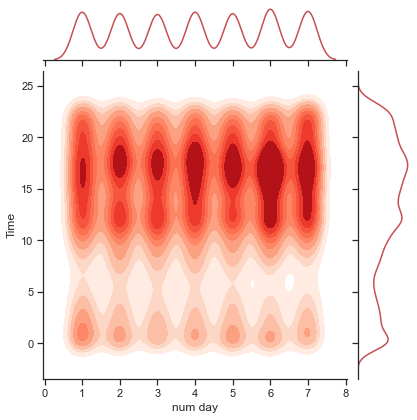

In [273]:
ax = sns.set(style= 'ticks')

f= property_ma_20_time['num day']
j= property_ma_20_time['Time'].dt.hour

a= sns.jointplot(f , j, kind = 'kde', color = 'r', shade = True, cmap='Reds');

In [308]:
comparison_join= pd.merge(compare_subs_19, compare_subs_20, how = 'left', on =['Incident Category' , 'Incident Subcategory'])

In [309]:
comparison_join

,Incident Category,Incident Subcategory,2019 Count,2020 Count
0,Motor Vehicle Theft,Motor Vehicle Theft,4537,6467
1,Motor Vehicle Theft,Motor Vehicle Theft (Attempted),40,90
2,Larceny Theft,Larceny - From Vehicle,24202,11164
3,Larceny Theft,Larceny Theft - Other,10130,6325
4,Larceny Theft,Larceny Theft - From Building,2341,1538
5,Larceny Theft,Larceny Theft - Shoplifting,2204,1228
6,Larceny Theft,Theft From Vehicle,1636,1582
7,Larceny Theft,Larceny Theft - Pickpocket,607,81
8,Larceny Theft,Larceny Theft - Bicycle,471,386
9,Larceny Theft,Larceny - Auto Parts,174,336


In [313]:
comparison_join['growth'] = round((((comparison_join['2020 Count'] - comparison_join['2019 Count'])*100)/ comparison_join['2019 Count']), 2) 


In [314]:
comparison_join

,Incident Category,Incident Subcategory,2019 Count,2020 Count,growth
0,Motor Vehicle Theft,Motor Vehicle Theft,4537,6467,42.54
1,Motor Vehicle Theft,Motor Vehicle Theft (Attempted),40,90,125.00
2,Larceny Theft,Larceny - From Vehicle,24202,11164,-53.87
3,Larceny Theft,Larceny Theft - Other,10130,6325,-37.56
4,Larceny Theft,Larceny Theft - From Building,2341,1538,-34.30
5,Larceny Theft,Larceny Theft - Shoplifting,2204,1228,-44.28
6,Larceny Theft,Theft From Vehicle,1636,1582,-3.30
7,Larceny Theft,Larceny Theft - Pickpocket,607,81,-86.66
8,Larceny Theft,Larceny Theft - Bicycle,471,386,-18.05
9,Larceny Theft,Larceny - Auto Parts,174,336,93.10


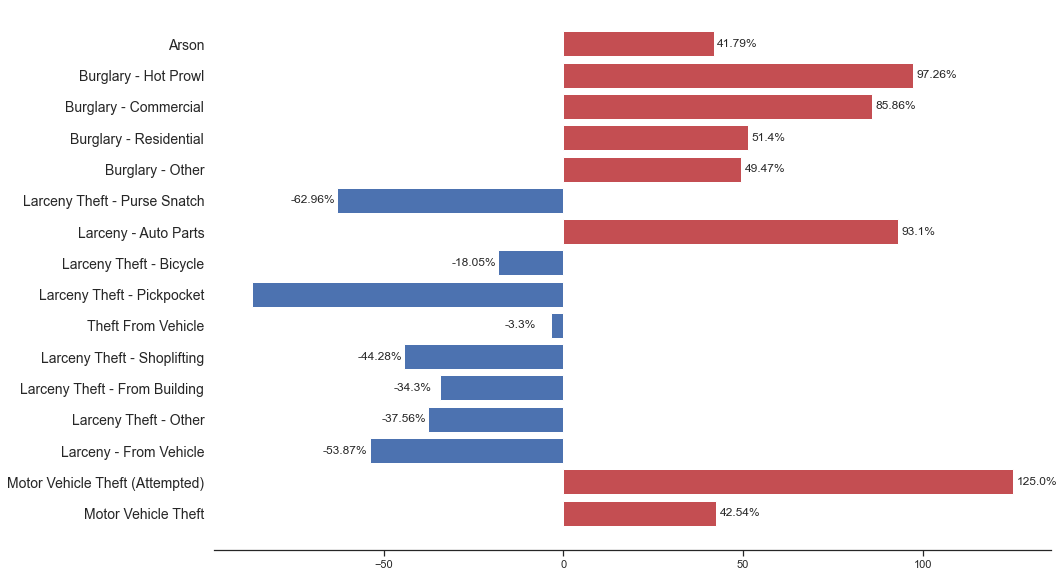

In [390]:
fig , ax = plt.subplots(figsize= (15,10))

plt.barh(comparison_join['Incident Subcategory'] , comparison_join['growth'] ,color=(comparison_join['growth'] > 0).map({True: 'r',
                                                    False: 'b'}), edgecolor= None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
    
plt.yticks(fontsize=14)
#ax.axes.get_xaxis().set_visible(False)
ax.tick_params(axis="y", left=False)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if width>0:
        ax.annotate(f'{width}%', (x + width+ 1
                                 , y+ height/2.5))
        
    else:
        ax.annotate(f'{width}%', (x + width -13 , y+ height/2.5))
    
    